# RSPMatch09

The python wrapper for RSPMatch09v2 can be tested by the example that comes with the software. Both input and output files are provided. The seed acceleration time series consists of 5996 data points separated by 0.005 seconds, giving a duration of 29.975 seconds. The PGA is 2.74 m/s2. The 5% damped target spectrum is defined at 200 logarithmic spaced points between 0.1 and 100 Hz. Its 3.12 m/s2 peak occurs at 20 Hz. When running RSPMatch with the wrapper, the seed acceleration time series and target response spectrum are written on the fly in a temporary working directory.

The calculation parameters of the example are manually extracted from the input files. The matching is performed in four passes with minimum frequencies of 1, 0.5, 0.3 and 0.1 Hz. The maximum frequency is 35 Hz. Each pass has maximum 20 iterations and a tolerance of 5%.

In [1]:
import os

from synthacc.recordings import plot_seismograms
from synthacc.response import plot_response_spectra
from synthacc.io.rspmatch09 import read_acc, read_tgt, read_rsp, run as run_rspmatch09

In [2]:
root_folder = %pwd

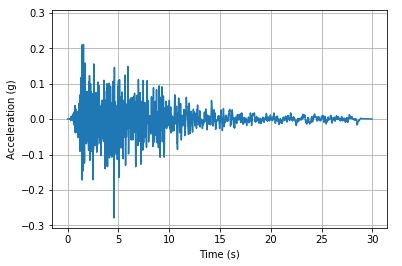

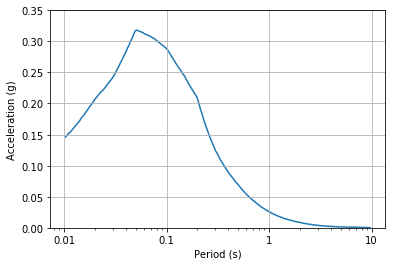

In [3]:
run_folder = os.path.join(root_folder, 'workspaces', 'rspmatch09')
seed_acc = read_acc(os.path.join(root_folder, 'data', 'rspmatch09', 'set3_h1_cmsT0.2.acc'))
target_uhs = read_tgt(os.path.join(root_folder, 'data', 'rspmatch09', 'cms_T0.2_horiz.tgt'))

seed_acc.plot()
target_uhs.plot()

In [4]:
params = {
    'passes':           4,
    'max_freq':         35,
    'scale_period':     0,
    'max_iterations':   [20, 20, 15, 15],
    'tolerance':        0.05,
    'min_freqs':        (1., 0.5, 0.3, 0.1),
    'time_window':      (0., 1000.),
    }

cal_mod_acc, cal_mod_rsp, cal_max_mis = run_rspmatch09(run_folder, seed_acc, target_uhs, params, remove_padding=False)

In [5]:
tgt_mod_acc = read_acc(os.path.join(root_folder, 'data', 'rspmatch09', 'run4.acc'))
tgt_mod_rs, tgt_max_mis = read_rsp(os.path.join(root_folder, 'data', 'rspmatch09', 'run4.rsp'))

In [6]:
print(cal_max_mis, tgt_max_mis)

13.09 13.09


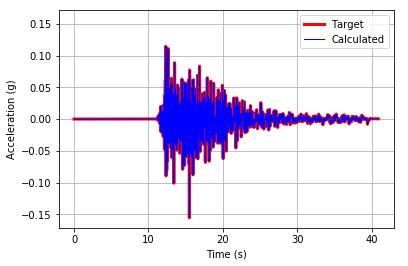

In [7]:
plot_seismograms([[tgt_mod_acc, cal_mod_acc]], labels=[['Target', 'Calculated']], colors=[['r', 'b']], widths=[[3, 1]])

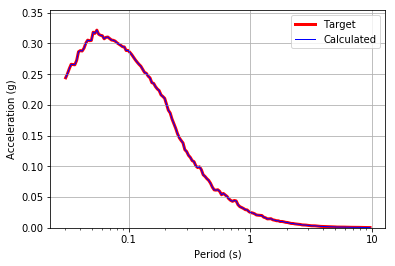

In [8]:
plot_response_spectra([tgt_mod_rs, cal_mod_rsp], labels=['Target', 'Calculated'], colors=['r', 'b'], widths=[3, 1])